In [30]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

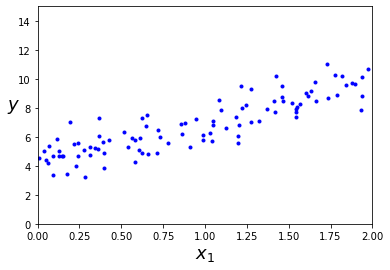

In [31]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()


### 정규방정식

In [32]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [33]:
theta_best

array([[4.20831857],
       [2.79226572]])

In [34]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.20831857],
       [9.79285   ]])

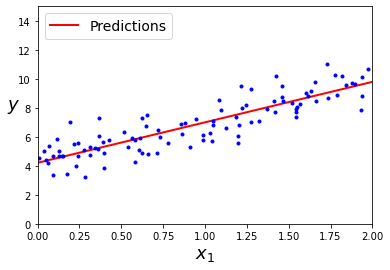

In [35]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.20831857]), array([[2.79226572]]))

In [37]:
lin_reg.predict(X_new)

array([[4.20831857],
       [9.79285   ]])

In [38]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.20831857],
       [2.79226572]])

In [39]:
np.linalg.pinv(X_b).dot(y)

array([[4.20831857],
       [2.79226572]])

### 배치 경사 하강법을 사용한 선형 회귀

In [40]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [41]:
theta


array([[4.20831857],
       [2.79226572]])

In [42]:
X_new_b.dot(theta)


array([[4.20831857],
       [9.79285   ]])

In [43]:
np.shape(X_b)

(100, 2)

In [44]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)      #X_b = np.c_[np.ones((100, 1)), X]  
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta) #예측
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)


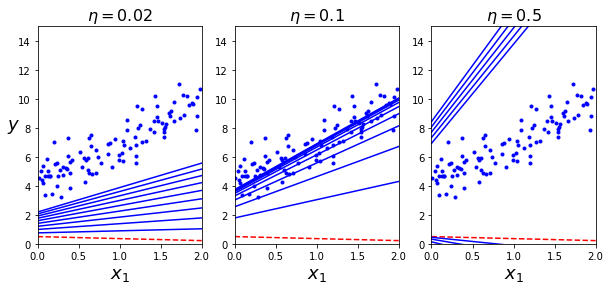

In [45]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

### 확률적 경사하강법

In [46]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

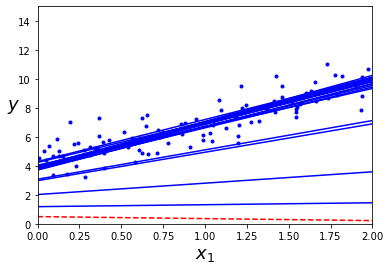

In [47]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_new = np.array([[0], [2]]) 
X_new_b = np.c_[np.ones((2, 1)), X_new] 
y_predict = X_new_b.dot(theta_best)

theta_path_sgd = []
m =100   #100
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # 훈련스텝의 첫 20개를 보여준다
            y_predict = X_new_b.dot(theta)           # 예측값구하기
            style = "b-" if i > 0 else "r--"         # 각 에폭의 첫번째 값은 빨간점선으로 표시하구 나머지는 파란색 실선으로 표현
            plt.plot(X_new, y_predict, style)        # 그래프생성
        random_index = np.random.randint(m)          # 0부터 99까지 중 랜덤으로 숫자 생성(한개의 셈플에 대해 무작위로 선택하기 위함)
        xi = X_b[random_index:random_index+1]        # 랜덤으로 무작위 샘플을 선택함(위에서 생성한 랜덤변수인 random_index를 사용한다.)
        yi = y[random_index:random_index+1]          # 랜덤으로 무작위 샘플을 선택함(위에서 생성한 랜덤변수인 random_index를 사용한다.)
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # 배치경사하강법
        eta = learning_schedule(epoch * m + i)       # 학습스케쥴 
        theta = theta - eta * gradients              # 다음스텝을 위한 수정 
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
plt.show()                                           

In [48]:
theta

array([[4.21076011],
       [2.74856079]])

In [49]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [50]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

### 미니배치 경사하강법

In [51]:
theta_path_mgd = []

n_iterations = 50    #반복횟수
minibatch_size = 20  #미니배치 사이즈

np.random.seed(42)
theta = np.random.randn(2,1)  # 세타 랜덤 초기화

t0, t1 = 200, 1000   
def learning_schedule(t):     #학습스케쥴링
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)#np.random.permutation은 nteger를 np.arange를 통해 array로 만들어준 값을 셔플한다. 
    X_b_shuffled = X_b[shuffled_indices] #랜덤으로 무작위 샘플 선택
    y_shuffled = y[shuffled_indices]     #랜덤으로 무작위 샘플 선택
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]  #무작위 샘플에 대한 예측값
        yi = y_shuffled[i:i+minibatch_size]    #무작위 샘플에 대한 예측값
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi) #배치경사하강법
        eta = learning_schedule(t)             #learning rate 스케쥴링
        theta = theta - eta * gradients        #next step에 대한 수정
        theta_path_mgd.append(theta)            

In [52]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [53]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

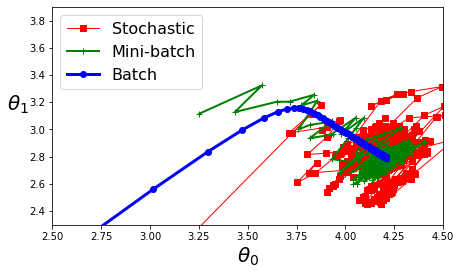

In [54]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

### 다항 회귀

In [55]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [56]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

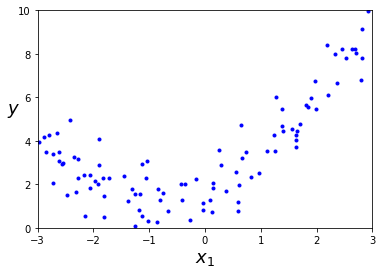

In [57]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [58]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [59]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [60]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

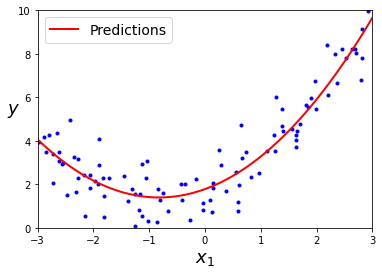

In [61]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

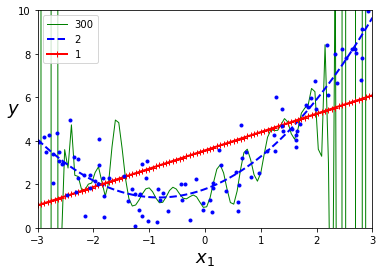

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler() #평균 0, 분산 1로 스케일 조정
    lin_reg = LinearRegression()  #회귀 클래스 
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])                        
    polynomial_regression.fit(X, y)                  #모델피팅
    y_newbig = polynomial_regression.predict(X_new) #예측
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [63]:
 from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])           #데이터 fitting
        y_train_predict = model.predict(X_train[:m])  #train set에 대한 예측
        y_val_predict = model.predict(X_val)          #validation set에 대한 예측
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) #y_train과 y_train_predict 에 대한 MSE
        val_errors.append(mean_squared_error(y_val, y_val_predict))           #y_val0과 y_val_predict 에 대한 MSE

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train_set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation_set")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

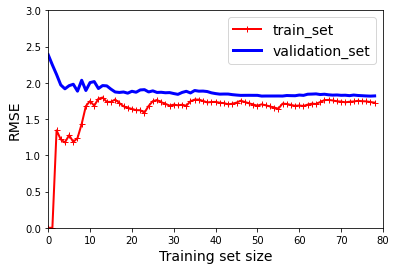

In [64]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
plt.show()                                      


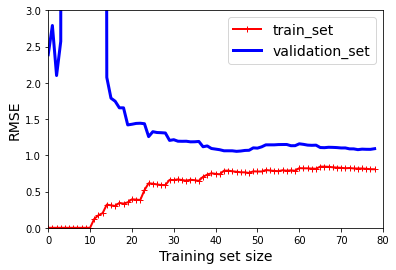

In [65]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)), #10차항(degree = 10)
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                        

### 릿지회귀

In [66]:
#릿지회귀
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82497007]])

In [67]:
#확률적 경사하강법
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42) #penalty 매개변수는 사용할 규제를 지정, l2는 sgd가 비용 함수에 가중치 벡터의 l2노름의 제곱을 2로 나눈 규제항을 추가하게 만든다.
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.81978491])

### 라쏘 회귀

In [68]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

### 엘라스틱 넷

In [69]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

조기종료

In [70]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [77]:
from copy import deepcopy

#90차항 다항회귀모델 및 스케일 조정
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train) #train set에 대해 90차항 다항회귀모델적용
X_val_poly_scaled = poly_scaler.transform(X_val)#validation set에 대해 90차항 다항회귀모델 적용 

#SGD 모델생성
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42) #warm_start = True : 이전에 업데이트된 coefficient를 초기화하지 않고 연속적으로 업데이트합니다. 
                                                                                             #eta0 : 학습률

#초기값설정 
minimum_val_error = float("inf") #최소에러값을 무한대로 초기화
best_epoch = None               
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  #모델학습
    y_val_predict = sgd_reg.predict(X_val_poly_scaled) #validation_set에 대한 예상
    val_error = mean_squared_error(y_val, y_val_predict)#validation set에 대한 MSE
    if val_error < minimum_val_error:                   #만약 val_error가 최소에러값 보다 작다면 val_error값이 최소에러값이 된다. 
        minimum_val_error = val_error
        best_epoch = epoch                              #그 순간의 에폭값 저장
        best_model = deepcopy(sgd_reg)                  #그 순간의 SGD모델을 저장

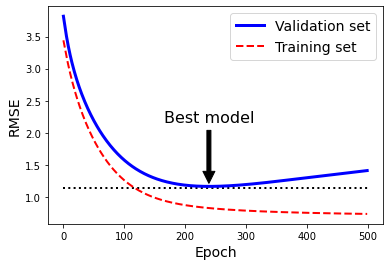

In [84]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),#xy : 화살표가 가르키는 점의 위치
             xytext=(best_epoch, best_val_rmse + 1), #xytext는 문자열이 출력될 위치 
             ha="center", 
             arrowprops=dict(facecolor='black', shrink=0.05), #화살표 모양
             fontsize=16,
            )#주석만들기 

best_val_rmse -= 0.03  #그래프를 더 이쁘게 구려준다.
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [85]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

결정경계

In [86]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [87]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [88]:
X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(np.int)  # Iris virginica이면 1 아니면 0

In [89]:
#로지스틱 회귀모델 훈련
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42) #lbfgs = 멀티클래쓰의 분류모델에 사용/ 성능이 좋은 알고리즘으로 알려져있음
log_reg.fit(X, y)

LogisticRegression(random_state=42)

[[9.99250016e-01 7.49984089e-04]
 [9.99240201e-01 7.59799387e-04]
 [9.99230257e-01 7.69743043e-04]
 ...
 [3.08374822e-03 9.96916252e-01]
 [3.04400296e-03 9.96955997e-01]
 [3.00476842e-03 9.96995232e-01]]
[1.66066066]


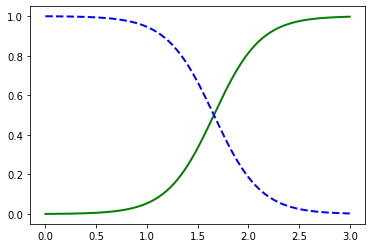

In [90]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) #0부터 3까지 1000개의 숫자를 만든다. 
y_proba = log_reg.predict_proba(X_new)
print(y_proba)
decision_boundary = (X_new[y_proba[:, 1] >= 0.5])[0] #[y_proba의 두번째행의값>=0.5]의 첫번째 값(결정경계값)
print(decision_boundary)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

In [66]:
decision_boundary

array([1.66066066])

In [67]:
log_reg.predict([[1.7], [1.5]]) #iris-Verginica 면 1, 아니면 0

array([1, 0])

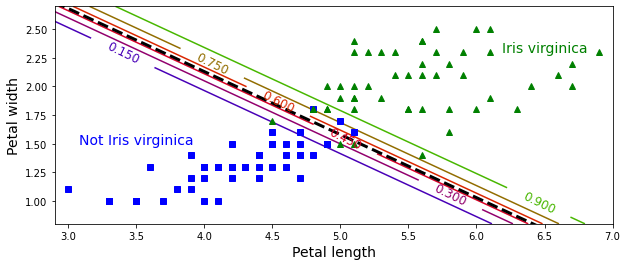

In [131]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # 길이, 너비
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42) #parameter C(cost function)
                                                                        #C값이 높으면 훈련을 더 복잡하게 -> 약한 규제 
                                                                       #C값이 낮으면 훈련을 덜 복잡하게 -> 강한 규제
#모델 훈련
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1), #2.9부터 7까지 500개의 숫자를 만든다. 500*1의 모양
        np.linspace(0.8, 2.7, 200).reshape(-1, 1), #0.8부터 2.7까지 200개의 숫자를 만든다. 200*1의 모양
    )
X_new = np.c_[x0.ravel(), x1.ravel()]   #np.ravel() 다차원 배열을 1차원으로 바꾸는 것 
y_proba = log_reg.predict_proba(X_new)  #예측

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

### 소프트맥스 회귀

In [94]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

(200, 500)
(200, 500)
(100000, 2)


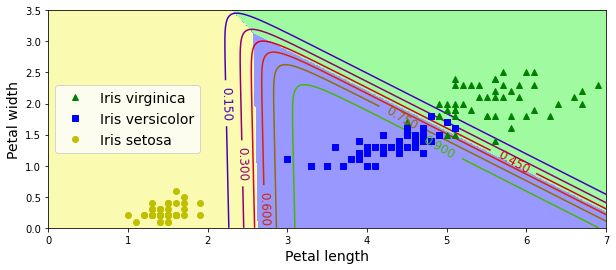

In [102]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),  #0에서 8까지 500개의 숫자 생성
        np.linspace(0, 3.5, 200).reshape(-1, 1),#0에서 3.5까지 200개의 숫자 생성
    )
print(np.shape(x0)) #(200, 500)
print(np.shape(x1)) #(200, 500)
X_new = np.c_[x0.ravel(), x1.ravel()]
print(np.shape(X_new))
y_proba = softmax_reg.predict_proba(X_new) #y_proba 100000*3의 형태(클래스에 속해있는확률(100%에서 빼야합니다))

y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)#두번째 클래스에 속해있을 확률값만 추출
zz = y_predict.reshape(x0.shape)#예측값

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap) #contourf(X,Y,Z)는 Z에 들어 있는 값에 대한 x 좌표와 y 좌표를 지정합니다.
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg) #Z에 들어 있는 값의 x 및 y 좌표를 지정합니다.
plt.clabel(contour, inline=1, fontsize=12) #clabel(C,h)는 현재 등고선 플롯의 각 등고선에 기울어진 텍스트를 삽입하여 레이블로 지정합니다
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

### 